<a href="https://colab.research.google.com/github/sapkotasriyas/MachineLearning/blob/main/Walmart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_features = pd.read_csv('features.csv')
df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
df_stores = pd.read_csv('stores.csv')
df_stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
df_test = pd.read_csv('test.csv')

In [5]:
df_train = pd.read_csv('train.csv')
df_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
#merging 3 dataframes using the common fields

df = df_features.merge(df_train, on = ['Store', 'Date'], how = 'inner').merge(df_stores, on=['Store'], how = 'inner')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False,A,151315


In [7]:
#removing and renaming the duplicate is holiday column
df.drop(['IsHoliday_y'], axis = 1, inplace = True)
df.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace = True)

In [8]:
df.shape

(421570, 16)

In [9]:
weekly_sales_table = pd.pivot_table(df, index='Dept', columns='Store',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(weekly_sales_table)

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Dept,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,30777.980769,7328.621049,36979.940070,9774.553077,23867.553776,9542.801259,14789.827343,11846.558252,39925.138951,...,2239.227413,11024.235874,6923.538531,21925.021189,18794.578811,23205.259930,10375.148392,7549.109021,8049.992308,17745.916014
2,46102.090420,65912.922517,16841.775664,93639.315385,12317.953287,50269.437273,22603.690769,35729.821748,24969.477413,109795.291469,...,13416.025664,16511.446224,10986.172657,67338.429371,26702.705175,48349.828951,15976.902448,20722.851469,9377.273007,35800.912448
3,13150.478042,17476.563357,5509.300769,19012.491678,4101.085175,16806.638811,8633.536923,10683.305105,7497.356783,32086.181469,...,381.324266,1297.862028,498.700210,20569.701608,6489.030350,17021.833357,814.451189,999.648881,571.016713,9508.014965
4,36964.154476,45607.666573,8434.186503,56603.400140,9860.806783,34187.366503,14950.518601,21089.309301,17165.947762,48579.826364,...,9873.505105,17614.013636,10669.501329,44807.515105,24386.750559,30538.574895,14885.264755,18227.382168,7403.959580,24229.873147
5,24257.941119,30555.315315,11695.366573,45668.406783,6699.202238,34465.307622,13860.350490,19838.849231,19282.746014,58373.460280,...,314.753982,1137.631189,397.418322,24043.436783,17689.671678,25513.943776,1052.296783,575.417326,960.670490,16107.063077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,120772.062168,143588.751888,15745.528252,147236.473706,19340.693986,89208.786294,34208.097273,62951.463706,29575.050769,73344.654685,...,39735.688741,51410.551119,41793.649021,103036.757133,66572.881259,88666.468392,61205.272308,72883.223287,31100.185175,52896.166643
96,33251.831639,34319.063846,3934.540000,38346.573077,5985.671119,30450.542238,1123.383217,16.986667,3596.107762,11079.676643,...,15683.341818,20375.380769,11981.676643,27089.158601,15309.077972,2883.492238,15183.474196,25058.369371,2834.139580,2.970000
97,35207.348811,40697.204056,343.437357,39339.238951,667.070315,20637.667063,4374.927902,16978.366503,372.655556,5323.506503,...,6469.273636,13960.701399,9902.368182,23993.406853,17131.033497,19789.219231,17495.198811,19349.989930,6636.467413,6466.961888


In [10]:
df['Dept'].nunique()
#Here we can see that the store number is accurate, but department number is off by 18.
#Also, the weekly sales includes a lot of negative and missing values

81

In [11]:
df.loc[df['Weekly_Sales']<=0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
188,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,47,-863.00,A,151315
406,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,47,-698.00,A,151315
2549,1,2010-10-08,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,47,-58.00,A,151315
3632,1,2011-01-21,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,False,54,-50.00,A,151315
4132,1,2011-03-11,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False,47,0.00,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,2012-05-25,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,False,49,-4.97,B,118221
420403,45,2012-06-29,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,False,49,-34.00,B,118221
420736,45,2012-08-03,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False,49,-1.91,B,118221
421007,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False,54,0.00,B,118221


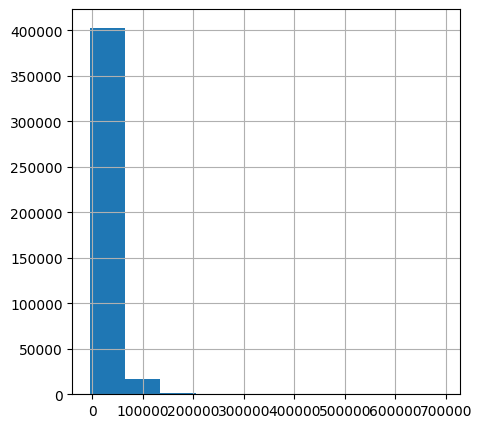

In [12]:
df_plot = df['Weekly_Sales'].hist(figsize = (5,5))

In [13]:
#turning all the zeros and negative numbers to null value
def g(df):
    df.loc[df['Weekly_Sales'] <= 0, 'Weekly_Sales'] = None
    return df

df = g(df.copy())
df['Weekly_Sales'].head()

0    24924.50
1    50605.27
2    13740.12
3    39954.04
4    32229.38
Name: Weekly_Sales, dtype: float64

In [14]:
#Since all the data are left skewed, we will fill them with median
df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean(), inplace = True)

In [15]:
df.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [16]:
df = df.fillna(0)
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [17]:
#Superbowl dates
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'), 'super_bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'), 'super_bowl'] = False

In [18]:
#Labor Day dates
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'), 'labor_day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'), 'labor_day'] = False

In [19]:
#Thanksgiving dates
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'), 'thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'), 'thanksgiving'] = False

In [20]:
#Christmas dates
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'), 'christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'), 'christmas'] = False

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

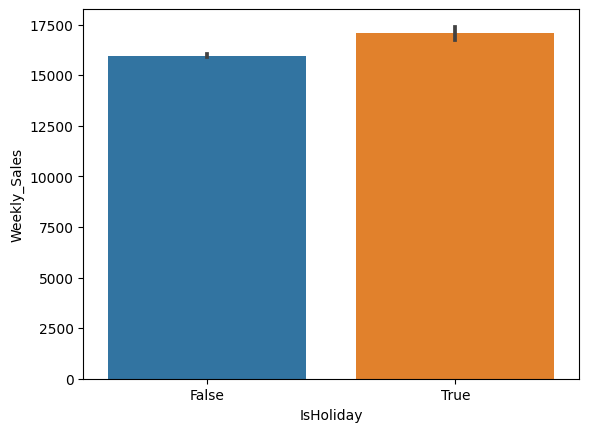

In [21]:
sns.barplot(x = 'IsHoliday', y='Weekly_Sales', data = df)

<Axes: xlabel='super_bowl', ylabel='Weekly_Sales'>

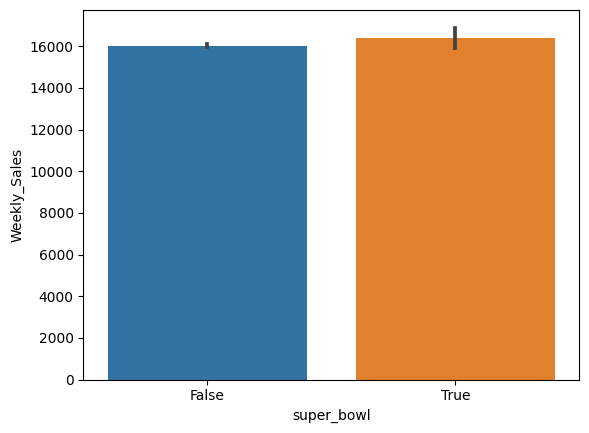

In [22]:
sns.barplot(x = 'super_bowl', y='Weekly_Sales', data = df)

<Axes: xlabel='labor_day', ylabel='Weekly_Sales'>

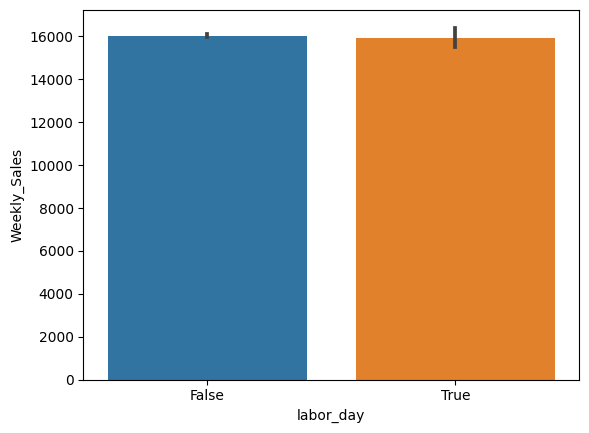

In [23]:
sns.barplot(x = 'labor_day', y='Weekly_Sales', data = df)

<Axes: xlabel='thanksgiving', ylabel='Weekly_Sales'>

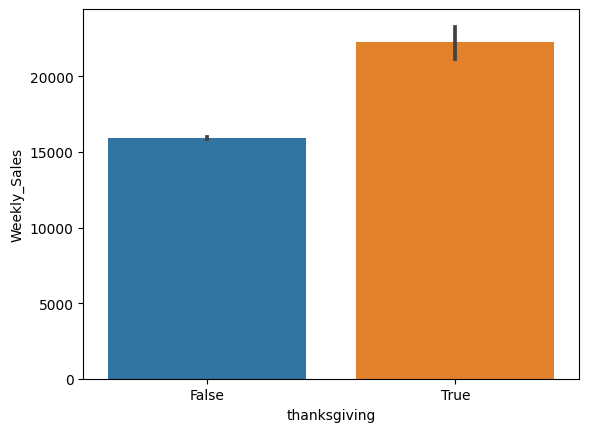

In [24]:
sns.barplot(x = 'thanksgiving', y='Weekly_Sales', data = df)

<Axes: xlabel='christmas', ylabel='Weekly_Sales'>

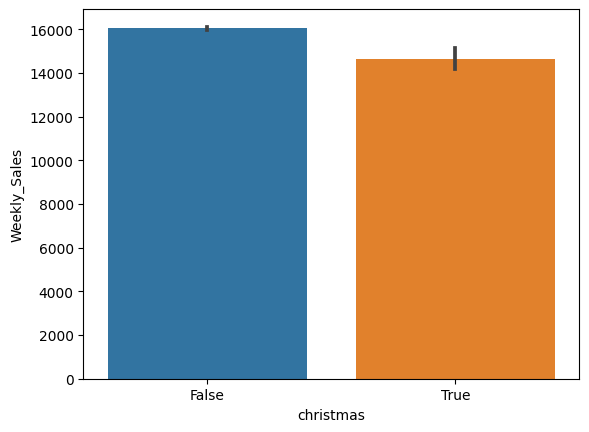

In [25]:
sns.barplot(x = 'christmas', y='Weekly_Sales', data = df)

In [26]:
df.groupby(['super_bowl', 'Type'])['Weekly_Sales'].mean()

super_bowl  Type
False       A       20128.033129
            B       12302.891802
            C        9556.513911
True        A       20610.746412
            B       12485.598092
            C       10192.530871
Name: Weekly_Sales, dtype: float64

In [27]:
df.groupby(['labor_day', 'Type'])['Weekly_Sales'].mean()

labor_day  Type
False      A       20141.254040
           B       12311.021098
           C        9562.486801
True       A       19998.152581
           B       12107.370120
           C        9907.240751
Name: Weekly_Sales, dtype: float64

In [28]:
df.groupby(['thanksgiving', 'Type'])['Weekly_Sales'].mean()

thanksgiving  Type
False         A       20034.303052
              B       12214.351245
              C        9567.759125
True          A       27386.583310
              B       18723.501013
              C        9707.270244
Name: Weekly_Sales, dtype: float64

In [29]:
df.groupby(['christmas', 'Type'])['Weekly_Sales'].mean()

christmas  Type
False      A       20164.525352
           B       12317.935067
           C        9590.646652
True       A       18300.426933
           B       11526.380176
           C        8098.423567
Name: Weekly_Sales, dtype: float64

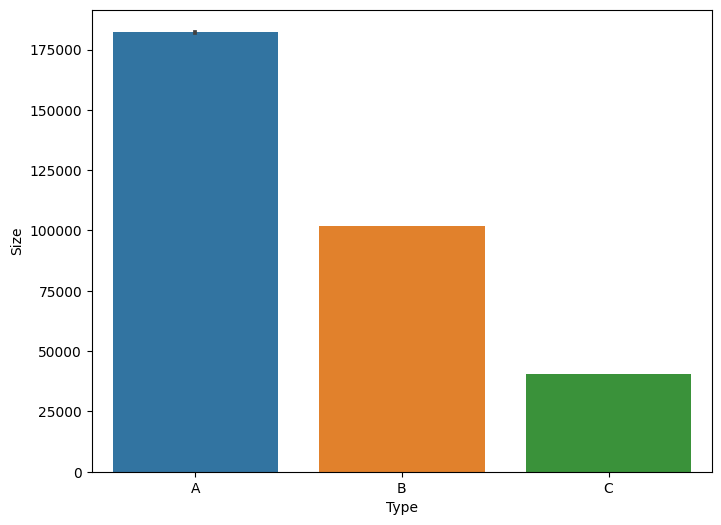

In [30]:
plt.figure(figsize = (8,6))
fig = sns.barplot(x='Type', y ='Size', data = df)

In [31]:
df['IsHoliday'] = df['IsHoliday'] .astype('bool').astype('int')
df['super_bowl'] = df['super_bowl'] .astype('bool').astype('int')
df['labor_day'] = df['labor_day'] .astype('bool').astype('int')
df['thanksgiving'] = df['thanksgiving'] .astype('bool').astype('int')
df['christmas'] = df['christmas'] .astype('bool').astype('int')

group_type = {'A':1, 'B': 2, 'C': 3}
df['Type'] = df['Type'].replace(group_type)

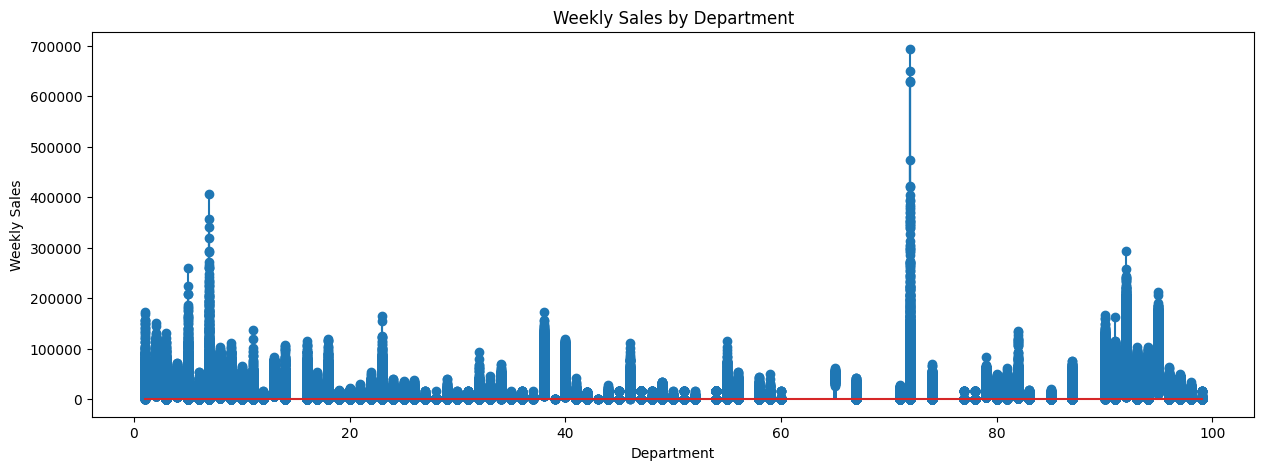

In [32]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize =(15,5))
plt.stem(x,y)
plt.title('Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()

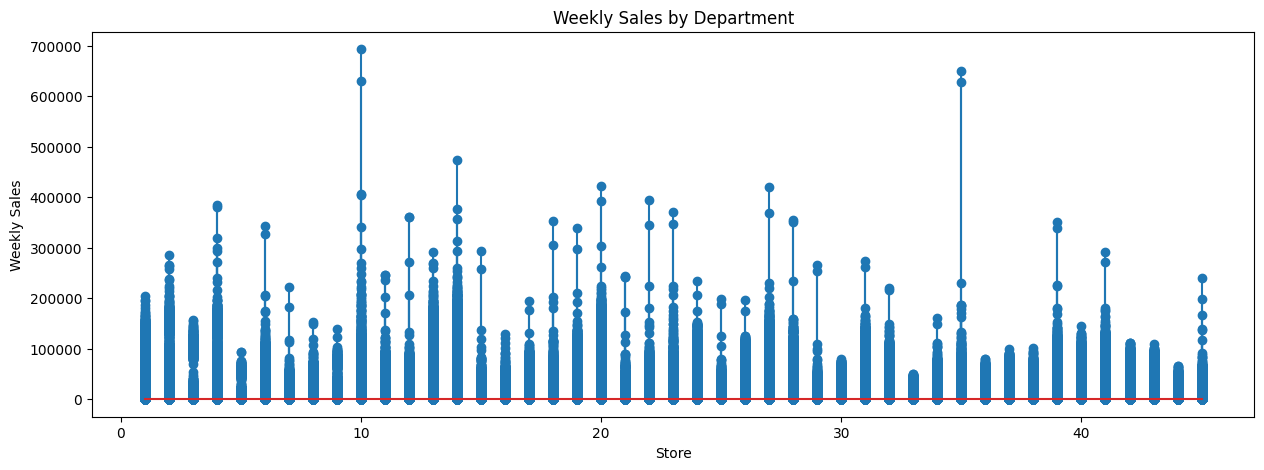

In [33]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize =(15,5))
plt.stem(x,y)
plt.title('Weekly Sales by Department')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

In [34]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,super_bowl,labor_day,thanksgiving,christmas
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,1,151315,0,0,0,0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,1,151315,0,0,0,0
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,1,151315,0,0,0,0
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,1,151315,0,0,0,0
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,1,151315,0,0,0,0


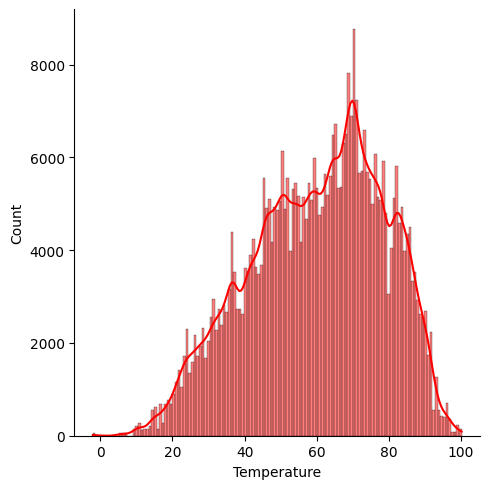

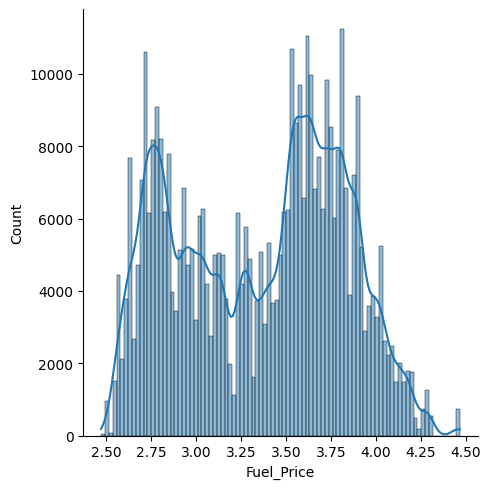

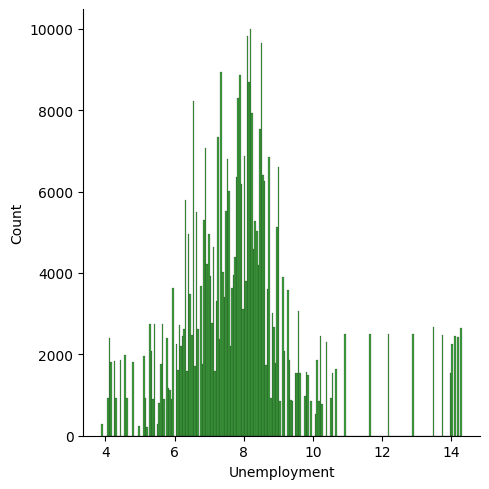

In [35]:
sns.displot(df['Temperature'], kde = True, color = 'r')
sns.displot(df['Fuel_Price'], kde = True)
sns.displot(df['Unemployment'], kde = False, color = 'g')

In [36]:
#checking for null values

df.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
super_bowl      0
labor_day       0
thanksgiving    0
christmas       0
dtype: int64

In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [38]:
X = df.drop(['Date', 'Weekly_Sales'], axis = 1)
y = df['Weekly_Sales']

In [39]:
#Creating Train-Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [40]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
rscale = RobustScaler()
rscale.fit(X_train)
X_train = rscale.transform(X_train)
X_test = rscale.transform(X_test)

In [41]:
from sklearn.metrics import(mean_squared_error, r2_score, mean_absolute_error, accuracy_score)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 50, random_state = 42, n_jobs = -1, max_depth = 35, min_samples_split= 10)

In [42]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [43]:
print(f"The MAE score of LinearRegression is: ", round(mean_absolute_error(rf_pred, y_test), 2))
print(f"The MSE score of LinearRegression is: ", round(mean_squared_error(rf_pred, y_test), 2))
print(f"The r2 score of LinearRegression is: ", round(r2_score(rf_pred, y_test), 2))

The MAE score of LinearRegression is:  1597.28
The MSE score of LinearRegression is:  15834541.84
The r2 score of LinearRegression is:  0.97
